In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import ExcelWriter
from pandas import ExcelFile
import glob
%matplotlib inline

# Wavelet Conversion

In [3]:
bmw_normal = pd.read_csv("1Normal.csv")
bmw_fuzz = pd.read_csv("2Fuzz.csv")
bmw_dos = pd.read_csv("3DoS.csv")
bmw_replay = pd.read_csv("4Replay.csv")

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import ExcelWriter
from pandas import ExcelFile
import glob
import pywt
import sys

In [4]:
bmw_normal = pd.concat([pd.DataFrame(bmw_normal.values[:, 3]), pd.DataFrame(bmw_normal.values[:,5:])], 
                        ignore_index=True, axis=1)
bmw_normal

,0,1,2,3,4,5,6,7,8,9
0,02A6,2,B8,NaN,NaN,NaN,NaN,NaN,NaN,Normal
1,00A5,AF,0D,2F,F8,82,36,0C,F1,Normal
2,397,D2,D8,A1,NaN,NaN,NaN,NaN,NaN,Normal
3,314,51,4,FF,NaN,NaN,NaN,NaN,NaN,Normal
4,281,ED,F3,NaN,NaN,NaN,NaN,NaN,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...
230087,01A1,53,C4,0E,1,91,NaN,NaN,NaN,Normal
230088,00A5,1E,0E,22,28,82,40,0C,F1,Normal
230089,314,50,0,FF,NaN,NaN,NaN,NaN,NaN,Normal
230090,03FB,D4,9C,1,0,F0,4E,NaN,NaN,Normal


In [5]:
norm = np.array(bmw_normal)

In [6]:
label1 = norm[:,9]
label1

array(['Normal', 'Normal', 'Normal', ..., 'Normal', 'Normal', 'Normal'],
      dtype=object)

In [7]:
norm1 = norm[:,:9]

In [8]:
from sklearn.preprocessing import LabelEncoder
#Cettegorical Value transfer into Number
labelecoder_df = LabelEncoder()
norm_scaled = pd.DataFrame(norm1).apply(LabelEncoder().fit_transform)
norm_scaled = np.array(norm_scaled)
norm_scaled = norm_scaled.astype(np.float32)

In [9]:
norm_scaled

array([[ 13.,  24., 184., ..., 172.,  56.,  24.],
       [  0., 175.,   4., ...,  32.,   2.,  20.],
       [ 53., 210., 216., ..., 172.,  56.,  24.],
       ...,
       [ 45.,  76.,   0., ..., 172.,  56.,  24.],
       [ 35., 212., 156., ...,  54.,  56.,  24.],
       [  2., 243., 243., ..., 172.,  56.,  24.]], dtype=float32)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


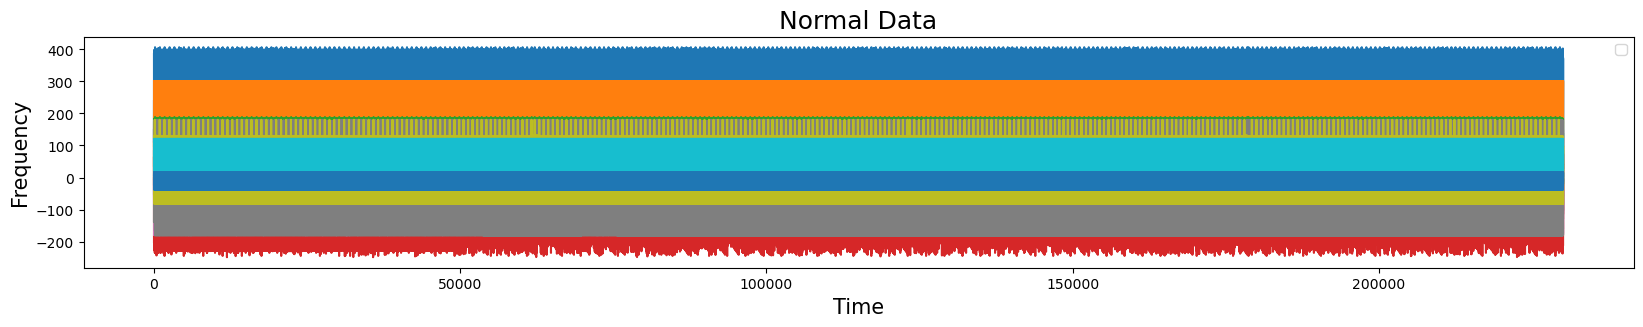

In [10]:
coeffs = pywt.wavedec(norm_scaled, 'db1', level=2, mode='periodic')
cAs2, cDs2, cDs1 = coeffs
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(cAs2)
plt.plot(cDs2)
plt.plot(cDs1)
plt.title('Normal Data', fontsize=18)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend()
plt.show()

In [11]:
print(len(cAs2))
print(len(cDs2))
print(len(cDs1))
print(cAs2.shape)
print(cDs2.shape)
print(cDs1.shape)

230092
230092
230092
(230092, 3)
(230092, 3)
(230092, 5)


In [12]:
NormalWave = pd.concat([pd.DataFrame(cAs2), pd.DataFrame(cDs2),
           pd.DataFrame(cDs1), pd.DataFrame(label1)], 
                        ignore_index=True, axis=1)
NormalWave.shape

(230092, 12)

In [13]:
#NormalWave.to_csv('NormalWave.csv', index = False)

In [14]:
bmw_normal = np.array(bmw_normal)
len(pd.value_counts(bmw_normal[:,0]))

56

# Fuzz

In [15]:
bmw_fuzz = np.array(bmw_fuzz)
bmw_fuzz = pd.concat([pd.DataFrame(bmw_fuzz[:, 3]), pd.DataFrame(bmw_fuzz[:,5:])], 
                        ignore_index=True, axis=1)
bmw_fuzz

,0,1,2,3,4,5,6,7,8,9
0,02BB,FB,FA,99,6C,F2,NaN,NaN,NaN,Fuzz
1,0,36,6C,FE,90,6,48,AC,12,Fuzz
2,0,36,6C,FE,90,6,48,AC,12,Fuzz
3,0,36,6C,FE,90,6,48,AC,12,Fuzz
4,0,36,6C,FE,90,6,48,AC,12,Fuzz
...,...,...,...,...,...,...,...,...,...,...
747198,5.00E+00,11,3,0,2,FF,FF,C0,FF,Fuzz
747199,5.00E+00,11,3,0,1,FF,FF,C0,FF,Fuzz
747200,5.00E+00,11,3,0,2,FF,FF,C0,FF,Fuzz
747201,5.00E+00,8C,1,0,32,0,18,0,FF,Fuzz


In [16]:
bmw_fuzz = np.array(bmw_fuzz)
len(pd.value_counts(bmw_fuzz[:,0]))

1496

In [17]:
fuzz = np.array(bmw_fuzz)

In [18]:
label2 = fuzz[:,9]
label2

array(['Fuzz', 'Fuzz', 'Fuzz', ..., 'Fuzz', 'Fuzz', 'Fuzz'], dtype=object)

In [19]:
fuzz = fuzz[:,:9]

In [20]:
fuzz.shape

(747203, 9)

In [21]:
from sklearn.preprocessing import LabelEncoder
#Cettegorical Value transfer into Number
labelecoder_df = LabelEncoder()
fuzz_scaled = pd.DataFrame(fuzz).apply(LabelEncoder().fit_transform)
fuzz_scaled = np.array(fuzz_scaled)
fuzz_scaled = fuzz_scaled.astype(np.float32)

In [22]:
fuzz_scaled

array([[ 374.,  251.,  250., ...,  256.,  256.,  256.],
       [   0.,   48.,  105., ...,   67.,  172.,   10.],
       [   0.,   48.,  105., ...,   67.,  172.,   10.],
       ...,
       [1336.,    9.,   41., ...,  255.,  192.,  255.],
       [1336.,  139.,    7., ...,   16.,    0.,  255.],
       [1336.,  139.,    0., ...,    0.,    0.,  255.]], dtype=float32)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


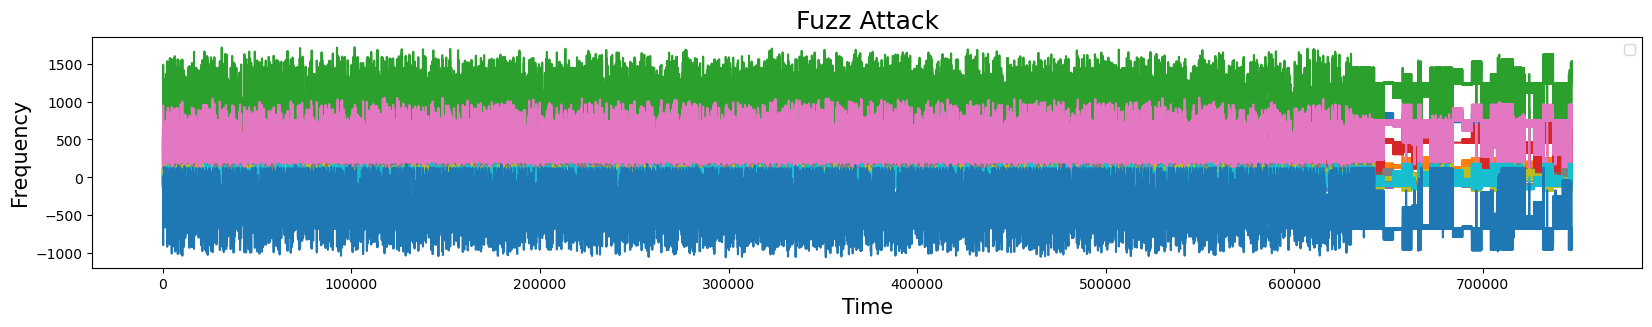

In [23]:
coeffs = pywt.wavedec(fuzz_scaled, 'db1', level=2, mode='periodic')
cAs2, cDs2, cDs1 = coeffs
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(cAs2)
plt.plot(cDs2)
plt.plot(cDs1)
plt.title('Fuzz Attack', fontsize=18)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend()
plt.show()

In [24]:
print(len(cAs2))
print(len(cDs2))
print(len(cDs1))
print(cAs2.shape)
print(cDs2.shape)
print(cDs1.shape)

747203
747203
747203
(747203, 3)
(747203, 3)
(747203, 5)


In [25]:
FuzzWave = pd.concat([pd.DataFrame(cAs2), pd.DataFrame(cDs2),
           pd.DataFrame(cDs1), pd.DataFrame(label2)], 
                        ignore_index=True, axis=1)
FuzzWave.shape

(747203, 12)

In [26]:
#FuzzWave.to_csv('FuzzWave.csv', index = False)

# DoS

In [27]:
bmw_dos = pd.concat([pd.DataFrame(bmw_dos.values[:, 3]), pd.DataFrame(bmw_dos.values[:,5:])], 
                        ignore_index=True, axis=1)
bmw_dos

,0,1,2,3,4,5,6,7,8,9
0,0,0,4,81,0,C0,2,20,4D,DoS
1,0,0,4,81,0,C0,2,20,4D,DoS
2,0,0,4,81,0,C0,2,20,4D,DoS
3,0,0,4,81,0,C0,2,20,4D,DoS
4,0,0,4,81,0,C0,2,20,4D,DoS
...,...,...,...,...,...,...,...,...,...,...
185420,316,45,43,D0,1B,43,11,AA,AA,DoS
185421,316,45,43,D0,1B,43,11,AA,AA,DoS
185422,316,45,43,D0,1B,43,11,AA,AA,DoS
185423,316,45,43,D0,1B,43,11,AA,AA,DoS


In [28]:
bmw_dos = np.array(bmw_dos)
len(pd.value_counts(bmw_dos[:,0]))

41

In [29]:
dos = np.array(bmw_dos)

In [30]:
label3 = dos[:,9]
label3

array(['DoS', 'DoS', 'DoS', ..., 'DoS', 'DoS', 'DoS'], dtype=object)

In [31]:
dos = dos[:,:9]
dos.shape

(185425, 9)

In [32]:
from sklearn.preprocessing import LabelEncoder
#Cettegorical Value transfer into Number
labelecoder_df = LabelEncoder()
dos_scaled = pd.DataFrame(dos).apply(LabelEncoder().fit_transform)
dos_scaled = np.array(dos_scaled)
dos_scaled = dos_scaled.astype(np.float32)

In [33]:
dos_scaled

array([[ 0.,  0., 13., ...,  6., 15.,  3.],
       [ 0.,  0., 13., ...,  6., 15.,  3.],
       [ 0.,  0., 13., ...,  6., 15.,  3.],
       ...,
       [33., 32., 15., ...,  2., 18.,  5.],
       [33., 32., 15., ...,  2., 18.,  5.],
       [33., 32., 15., ...,  2., 18.,  5.]], dtype=float32)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


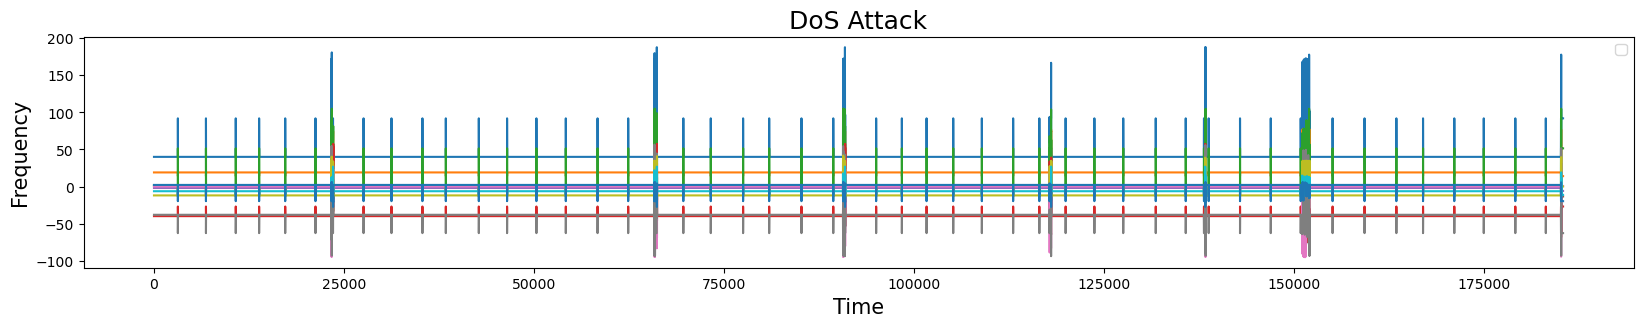

In [34]:
coeffs = pywt.wavedec(dos_scaled, 'db1', level=2, mode='periodic')
cAs2, cDs2, cDs1 = coeffs
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(cAs2)
plt.plot(cDs2)
plt.plot(cDs1)
plt.title('DoS Attack', fontsize=18)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend()
plt.show()

In [35]:
print(len(cAs2))
print(len(cDs2))
print(len(cDs1))
print(cAs2.shape)
print(cDs2.shape)
print(cDs1.shape)

185425
185425
185425
(185425, 3)
(185425, 3)
(185425, 5)


In [36]:
DoSWave = pd.concat([pd.DataFrame(cAs2), pd.DataFrame(cDs2),
           pd.DataFrame(cDs1), pd.DataFrame(label3)], 
                        ignore_index=True, axis=1)
DoSWave.shape

(185425, 12)

In [37]:
#DoSWave.to_csv('DoSWave.csv', index = False)

# Replay

In [38]:
bmw_replay = pd.concat([pd.DataFrame(bmw_replay.values[:, 3]), pd.DataFrame(bmw_replay.values[:,5:])], 
                        ignore_index=True, axis=1)
bmw_replay

,0,1,2,3,4,5,6,7,8,9
0,02BB,F2,F1,0E,FC,F2,NaN,NaN,NaN,Replay
1,019A,FF,FF,B7,7F,FF,FF,NaN,NaN,Replay
2,019F,64,F9,A5,80,0,20,NaN,NaN,Replay
3,01A1,A2,D4,BB,7,91,NaN,NaN,NaN,Replay
4,00A5,5,1,C0,F7,7B,B8,16,F1,Replay
...,...,...,...,...,...,...,...,...,...,...
45360,00F6,F3,F3,NaN,NaN,NaN,NaN,NaN,NaN,Replay
45361,02BB,11,F1,2C,A7,F2,NaN,NaN,NaN,Replay
45362,173,44,FD,0,2,20,0,2,7,Replay
45363,316,45,43,D0,1B,43,11,AA,AA,Replay


In [39]:
bmw_replay = np.array(bmw_replay)
len(pd.value_counts(bmw_replay[:,0]))

56

In [40]:
replay = np.array(bmw_replay)
label4 = replay[:,9]
label4

array(['Replay', 'Replay', 'Replay', ..., 'Replay', 'Replay', 'Replay'],
      dtype=object)

In [41]:
replay = replay[:,:9]
replay.shape

(45365, 9)

In [42]:
from sklearn.preprocessing import LabelEncoder
#Cettegorical Value transfer into Number
labelecoder_df = LabelEncoder()
replay_scaled = pd.DataFrame(replay).apply(LabelEncoder().fit_transform)
replay_scaled = np.array(replay_scaled)
replay_scaled = replay_scaled.astype(np.float32)

In [43]:
replay_scaled

array([[ 14., 242., 212., ..., 142.,  46.,  16.],
       [  4., 255., 226., ..., 141.,  46.,  16.],
       [  5.,  97., 220., ...,  20.,  46.,  16.],
       ...,
       [ 37.,  63., 224., ...,   0.,  23.,   9.],
       [ 46.,  64.,  55., ...,   7.,  40.,  10.],
       [ 42., 121., 195., ..., 134.,  44.,  16.]], dtype=float32)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


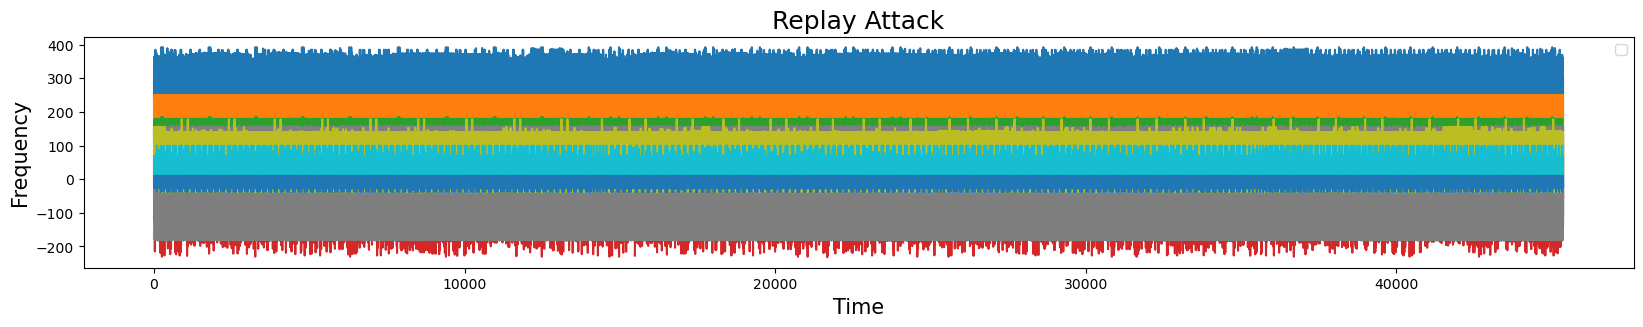

In [44]:
coeffs = pywt.wavedec(replay_scaled, 'db1', level=2, mode='periodic')
cAs2, cDs2, cDs1 = coeffs
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(cAs2)
plt.plot(cDs2)
plt.plot(cDs1)
plt.title('Replay Attack', fontsize=18)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend()
plt.show()

In [45]:
print(len(cAs2))
print(len(cDs2))
print(len(cDs1))
print(cAs2.shape)
print(cDs2.shape)
print(cDs1.shape)

45365
45365
45365
(45365, 3)
(45365, 3)
(45365, 5)


In [46]:
replayWave = pd.concat([pd.DataFrame(cAs2), pd.DataFrame(cDs2),
           pd.DataFrame(cDs1), pd.DataFrame(label4)], 
                        ignore_index=True, axis=1)
replayWave.shape

(45365, 12)

In [47]:
#replayWave.to_csv('replayWave.csv', index = False)

# Deep Learning

In [48]:
# Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   # plotting
import seaborn as sns   # plotting heatmap
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import os
import pprint
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization

In [49]:
# lstm model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from matplotlib import pyplot
import keras
from tensorflow.keras.layers import GRU
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import BatchNormalization

In [50]:
bmw_normal = pd.read_csv("1NormalWave.csv")
bmw_fuzz = pd.read_csv("2FuzzWave.csv")
bmw_dos = pd.read_csv("3DoSWave.csv")
bmw_replay = pd.read_csv("4ReplayWave_mani___.csv")

In [51]:
Final = pd.concat([pd.DataFrame(bmw_normal), pd.DataFrame(bmw_fuzz),
                        pd.DataFrame(bmw_dos), pd.DataFrame(bmw_replay)], 
                        ignore_index=True)
Final.shape

(1200000, 12)

In [52]:
Final = np.array(Final)

In [53]:
Final[0]

array([ 238.5      ,  300.5      ,   36.999996 , -201.5      ,
         72.5      ,    0.       ,   -7.7781744,  -50.911682 ,
         98.28784  ,   82.02438  ,    7.7781744,    0.       ])

In [54]:
RearrangeData = Final.reshape(-1,10000,Final.shape[1])
shuffle_idx = np.random.permutation(RearrangeData.shape[0])
RearrangeData = RearrangeData[shuffle_idx]

In [55]:
print('Old:', RearrangeData.shape)
RearrangeData = RearrangeData.reshape(1200000, 12)
print('Updated:',RearrangeData.shape)

Old: (120, 10000, 12)
Updated: (1200000, 12)


In [56]:
RearrangeData = RearrangeData.reshape(1200000, 12)
RearrangeData.shape

(1200000, 12)

In [57]:
RearrangeData[:,11]

array([1., 1., 1., ..., 1., 1., 1.])

In [58]:
#Data normalization by scalling
scaler = MinMaxScaler(feature_range=(0, 1))
Final_DataFrame_scaled = scaler.fit_transform(RearrangeData[:,:11])
Final_DataFrame_scaled.shape

(1200000, 11)

In [59]:
Final_DataFrame_scaled

array([[0.63715199, 0.63492067, 0.72019819, ..., 0.18431373, 0.21414536,
        0.3350545 ],
       [0.63715199, 0.63492067, 0.72019819, ..., 0.18431373, 0.21414536,
        0.3350545 ],
       [0.63715199, 0.63492067, 0.72019819, ..., 0.18431373, 0.21414536,
        0.3350545 ],
       ...,
       [0.3947969 , 0.77182544, 0.30515885, ..., 0.54705883, 0.18860513,
        0.70969592],
       [0.3947969 , 0.77182544, 0.30515885, ..., 0.54705883, 0.18860513,
        0.70969592],
       [0.3947969 , 0.77182544, 0.30515885, ..., 0.54705883, 0.18860513,
        0.70969592]])

In [60]:
X = Final_DataFrame_scaled[:, :11]
y = RearrangeData[:,11]

In [61]:
pd.value_counts(y)

1.0    734483
0.0    230092
2.0    185425
3.0     50000
dtype: int64

In [62]:
X_trainX = []
y_trainX = []
timestamp = 10
length = len(Final_DataFrame_scaled)

for i in range(timestamp, length):
    X_trainX.append(X[i-timestamp:i, :11])
    y_trainX.append(y[i])
    
    if i >= 1200000:
        break

In [72]:
print(len(X_trainX))
print(len(y_trainX))

1199990
1199990


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_trainX, y_trainX, test_size=0.05, random_state=5, shuffle=True)

In [64]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [65]:
print(X_train.shape)

(1139990, 10, 11)


In [66]:
pd.value_counts(y_test)

1.0    36970
0.0    11336
2.0     9242
3.0     2452
dtype: int64

In [67]:
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

In [68]:
y_test

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [69]:
#Resape data into 3 dimention
X_train = np.reshape(X_train, (X_train.shape[0], 10, 11))
X_test = np.reshape(X_test, (X_test.shape[0], 10, 11))

In [70]:
print(X_train[0])
print('\n')
print(y_train[0])

[[0.7663167  0.38392859 0.89361702 0.83179296 0.38068811 0.65877728
  0.95582331 0.32289626 0.31764706 0.50687623 0.09236948]
 [0.66636239 0.71924602 0.73826873 0.67329023 0.7624861  0.71597602
  0.71313829 0.9726027  0.51960782 0.3280943  0.35169249]
 [0.66636239 0.71924602 0.73826873 0.67329023 0.7624861  0.71597602
  0.71313829 0.9726027  0.51960782 0.3280943  0.35169249]
 [0.66636239 0.71924602 0.73826873 0.67329023 0.7624861  0.71597602
  0.71313829 0.9726027  0.51960782 0.3280943  0.35169249]
 [0.66636239 0.71924602 0.73826873 0.67329023 0.7624861  0.71597602
  0.71313829 0.9726027  0.51960782 0.3280943  0.35169249]
 [0.38019169 0.86805555 0.26464588 0.2634011  0.36071032 0.49704129
  0.1147447  0.74951075 0.24509804 0.49705304 0.88640275]
 [0.66636239 0.71924602 0.73826873 0.67329023 0.7624861  0.71597602
  0.71313829 0.9726027  0.51960782 0.3280943  0.35169249]
 [0.66636239 0.71924602 0.73826873 0.67329023 0.7624861  0.71597602
  0.71313829 0.9726027  0.51960782 0.3280943  0.35

In [23]:
#Model Generation
model = Sequential()

model.add(LSTM(units = 120, activation='tanh', return_sequences = True, input_shape = (10, 11)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(units = 120, activation='tanh', return_sequences = True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(units = 120, activation='tanh', return_sequences = True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(units = 120, activation='tanh', return_sequences = False))
model.add(Dropout(0.2))
model.add(BatchNormalization())

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

model.add(Dense(units = 4, activation='softmax'))
model.compile(optimizer = optimizer, loss = 'CategoricalCrossentropy', metrics=['accuracy'])

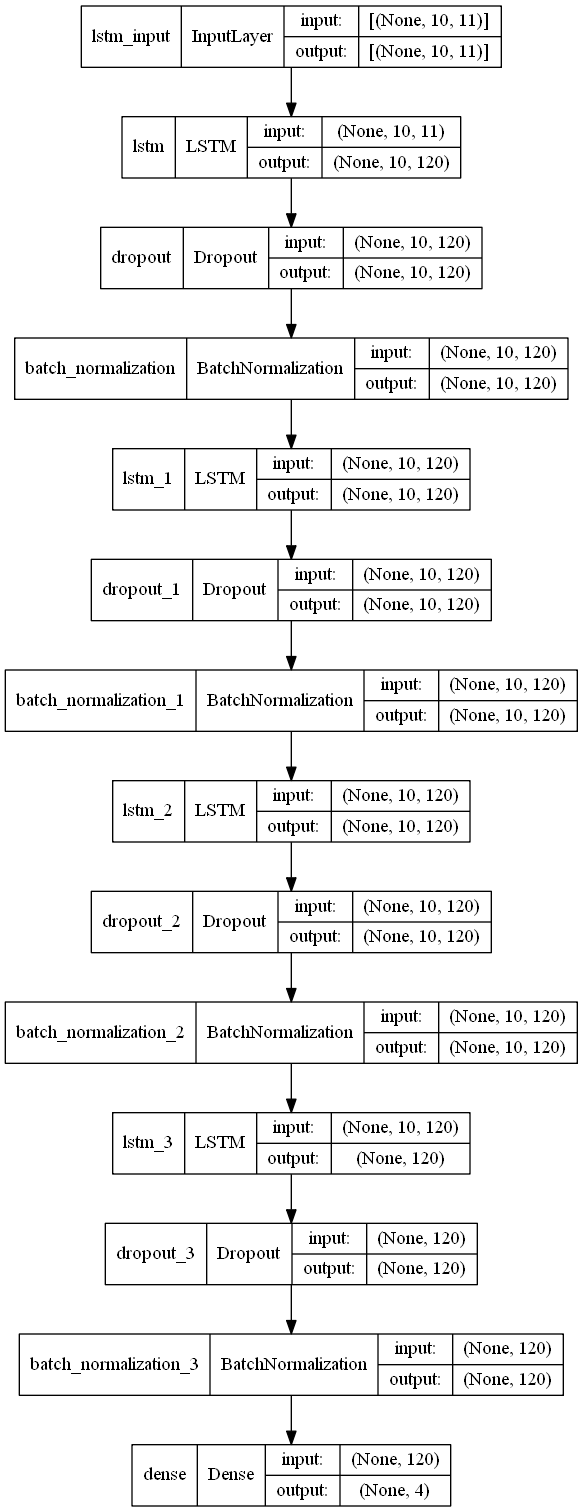

In [24]:
plot_model(model, to_file='IMIS.png', show_shapes=True, show_layer_names=True)

In [25]:
cp = tf.keras.callbacks.ModelCheckpoint(filepath="1IMIS.h5",
                               mode='min', monitor='val_loss', verbose=0, save_best_only=True)
# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True)

In [26]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[cp, early_stop]
                    ).history

Epoch 1/5
  61/8907 [..............................] - ETA: 2:39 - loss: 0.4220 - accuracy: 0.8587

KeyboardInterrupt: 

In [ ]:
# plot the training losses
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
ax.plot(model.history.history['loss'], 'b', label='Train', linewidth=2)
ax.plot(model.history.history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [116]:
from keras.models import load_model

# returns a compiled model
# identical to the previous one
model = load_model('1IMIS.h5')

In [141]:
#Prediction
pred = model.predict(X_test)
#obj = scaler.fit(y_pred)
#predicted = obj.inverse_transform(y_pred)

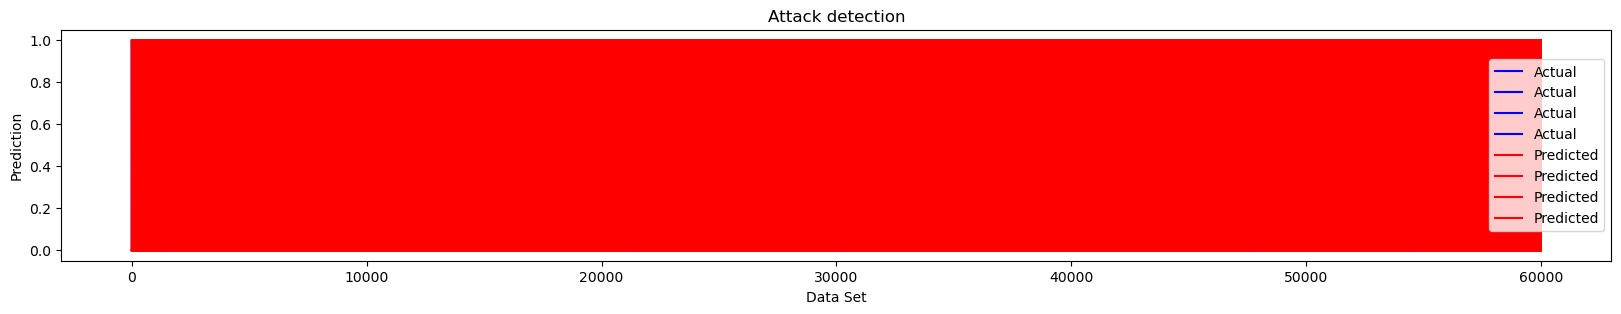

In [142]:
plt.plot(y_test, color = 'blue', label = 'Actual')
plt.plot(pred, color = 'red', label = 'Predicted')
plt.title('Attack detection')
plt.xlabel('Data Set')
plt.ylabel('Prediction')
plt.legend()
plt.show()

In [143]:
y_train[0]

array([1., 0., 0., 0.], dtype=float32)

In [144]:
pred.shape

(60000, 4)

In [145]:
y_test[0]

array([0., 1., 0., 0.], dtype=float32)

In [146]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(pred, axis=1)
# label
y_test = np.argmax(y_test, axis=1)
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[11588    10     0     4]
 [   11 36701     4     1]
 [    2     3  9131     0]
 [  170     0     0  2375]]


In [147]:
y_pred[0]

1

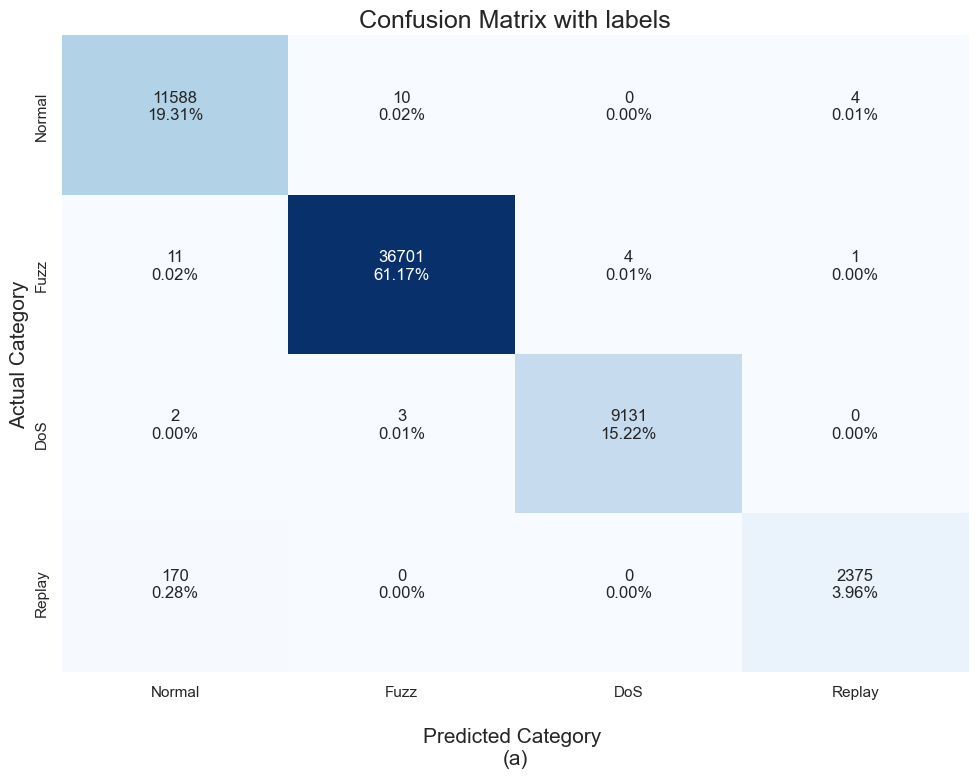

In [156]:
#group_names = ['True Neg','False Pos','False Neg','True Pos','True Pos','True Pos','True Pos','True Pos','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(4,4)
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False)

ax.set_title('Confusion Matrix with labels', fontsize=18);
ax.set_xlabel('\nPredicted Category \n(a)', fontsize=15)
ax.set_ylabel('Actual Category', fontsize=15);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Normal", "Fuzz", "DoS", "Replay"])
ax.yaxis.set_ticklabels(["Normal", "Fuzz", "DoS", "Replay"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [152]:
from sklearn.metrics import classification_report
class_names = ["Normal", "Fuzz", "DoS", "Replay"]
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      Normal       0.98      1.00      0.99     11602
        Fuzz       1.00      1.00      1.00     36717
         DoS       1.00      1.00      1.00      9136
      Replay       1.00      0.93      0.96      2545

    accuracy                           1.00     60000
   macro avg       1.00      0.98      0.99     60000
weighted avg       1.00      1.00      1.00     60000



ROC AUC score: 0.9908134321456393


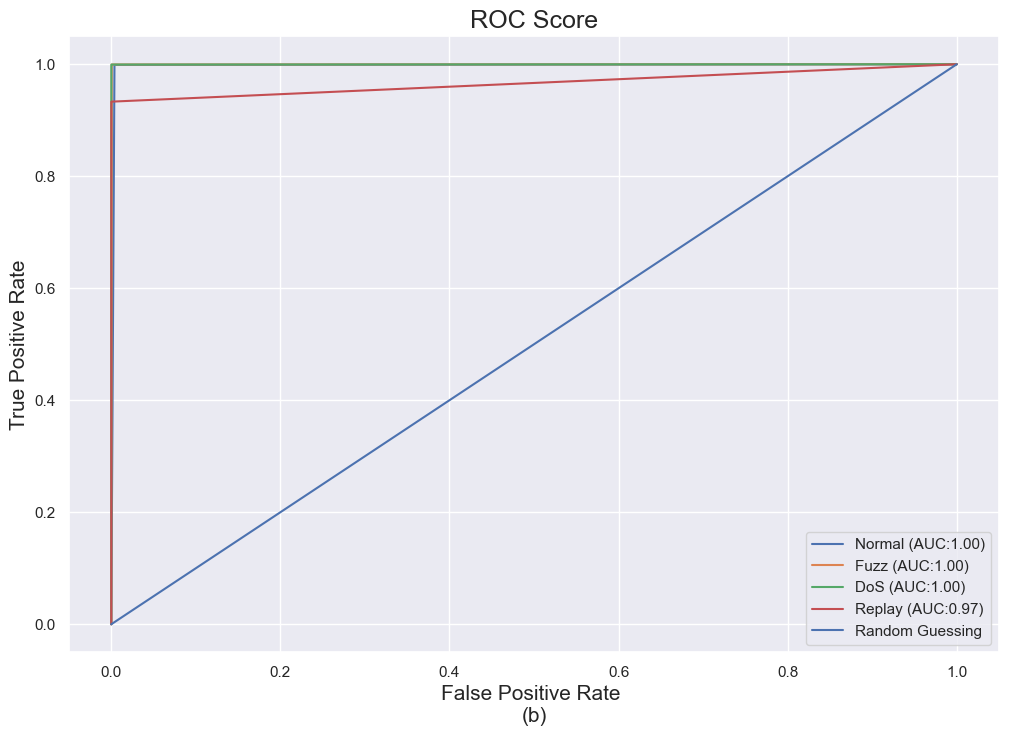

In [155]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ["Normal", "Fuzz", "DoS", "Replay"]

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_pred))

c_ax.legend()
c_ax.set_title('ROC Score', fontsize=18);
c_ax.set_xlabel('False Positive Rate \n(b)', fontsize=15)
c_ax.set_ylabel('True Positive Rate', fontsize=15)
plt.show()